In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
df = df.drop(['Date', 'Functioning Day'], axis=1)
df['Holiday'].replace({'No Holiday':1, 'Holiday':1}, inplace=True)
df['Seasons'].replace({'Winter':1, 'Spring':2, 'Summer':3, 'Autumn':4}, inplace=True)
df["Hour"]= df['Hour'].add(1)
df["Solar Radiation (MJ/m2)"] = df["Solar Radiation (MJ/m2)"].add(1)
df["Rainfall(mm)"] = df["Rainfall(mm)"].add(1)
df["Snowfall (cm)"] = df["Snowfall (cm)"].add(1)
#df = df.sample(frac=1, random_state=3).reset_index(drop=True)   #Shuffling Data Instances as data is chronological

y = df['Rented Bike Count']
X = df.drop(['Rented Bike Count'],axis=1)
x_train = X[-5000:]
x_test = X[:-5000]
y_test = y[:-5000]
y_train = y[-5000:]

def graph (model, thing, name):
    plt.clf()
    sfs = SFS(model, 
          k_features=4, 
          forward=thing, 
          cv=5)

    sfs = sfs.fit(x_test, y_test)

    fig1 = plot_sfs(sfs.get_metric_dict(),
                kind='std_dev',
                figsize=(6, 4))

    plt.ylim([0.0, 1])
    if bool:
        word = "Forward"
    else:
        word = "Backward"
    plt.title(f'Sequential {word} for {name} Selection (w. StdDev)')
    plt.grid()
    plt.show()

<Figure size 432x288 with 0 Axes>

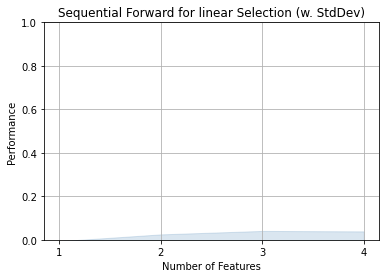

<Figure size 432x288 with 0 Axes>

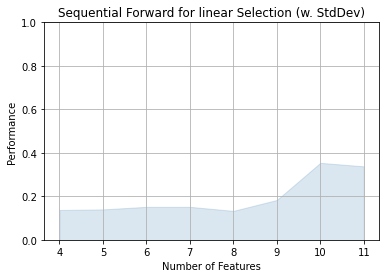

<Figure size 432x288 with 0 Axes>

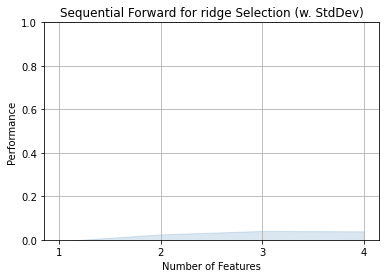

<Figure size 432x288 with 0 Axes>

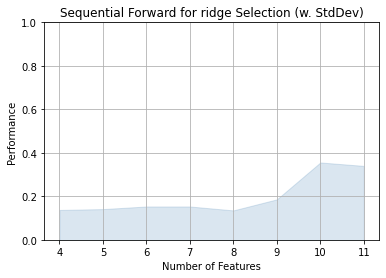

<Figure size 432x288 with 0 Axes>

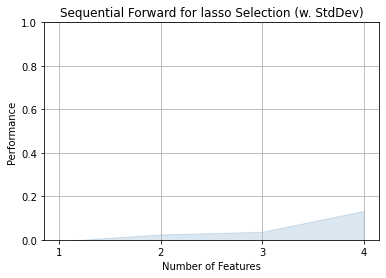

<Figure size 432x288 with 0 Axes>

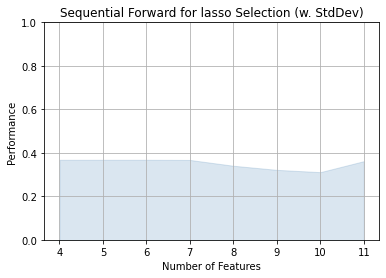

<Figure size 432x288 with 0 Axes>

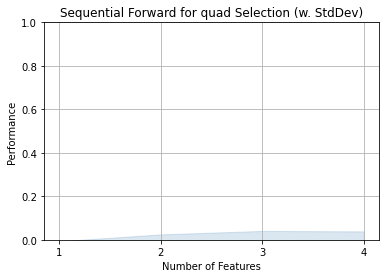

<Figure size 432x288 with 0 Axes>

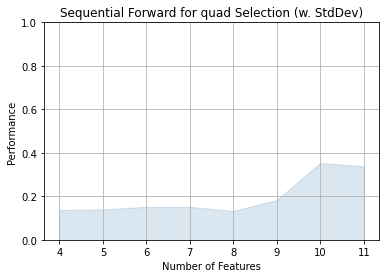

In [ ]:
linear = LinearRegression().fit(x_train,y_train)
ridge = RidgeCV().fit(x_train,y_train)
lasso = LassoCV().fit(x_train,y_train)
                      
quad = PolynomialFeatures(degree=2)
train = quad.fit_transform(x_train)
test = quad.fit_transform(x_test)
quad = LinearRegression().fit(train,y_train)

                      
graph(linear,True, "linear")
graph(linear,False, "linear")
graph(ridge, True, "ridge")
graph(ridge, False, "ridge")
graph(lasso, True, "lasso")
graph(lasso, False, "lasso")
graph(quad, True, "quad")
graph(quad, False, "quad")
graph(symb, True, "symb")
graph(symb, False, "symb")